<a href="https://colab.research.google.com/github/garg1709/Hamoye-Data-Science-Internship/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
#from bayes_opt import BayesianOptimization

import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
#from fbprophet import Prophet
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
url = 'https://raw.githubusercontent.com/garg1709/Hamoye-Data-Science-Internship/main/1st_Capstone_Project/Foreign_Exchange_Rates.csv'
df = pd.read_csv(url, sep=',')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (5217, 24)


,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [5]:
# Let's extract one country's data and try to understand its behaviour. We'll take UK for illustration purpose. All our EDA and model building
# will revolve around UK.

In [6]:
df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [7]:
data = df[['Time Serie', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$']]
data.columns = ['date', 'rate']

In [8]:
data.head(15)

,date,rate
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.607
4,2000-01-07,0.6104
5,2000-01-10,0.6107
6,2000-01-11,0.6068
7,2000-01-12,0.6073
8,2000-01-13,0.6067
9,2000-01-14,0.6115


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    5217 non-null   object
 1   rate    5217 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB


In [10]:
data.rate.describe()

count     5217
unique    2303
top         ND
freq       198
Name: rate, dtype: object

In [11]:
data.nunique()

date    5217
rate    2303
dtype: int64

In [12]:
# We can see we have some value 'ND' in our dataset. Let's remove these values to ensure we are able to make forecasting accurately.
# We are not sure of what ND means.

In [13]:
# Remove rates with a value of ND.

data = data.drop(data[data['rate']=='ND'].index)

# Converts the rates to numeric value.

data['rate'] = pd.to_numeric(data.rate)

# Sort values by date. This is important as the values should always be in ascending order to make forecasts.
data = data.sort_values('date', ascending=True)

In [14]:
data.rate.describe()

count    5019.000000
mean        0.640372
std         0.082611
min         0.473800
25%         0.587400
50%         0.636400
75%         0.692350
max         0.828700
Name: rate, dtype: float64

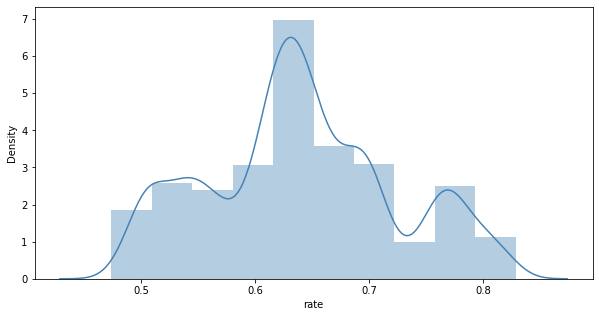

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue');

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.date, y=data.rate, marker_color='lightgreen'))

fig.update_layout(title='TIME-SERIES PLOT OF UNITED KINGDOM POUND RATE', 
                  height=450, width=1000, template='plotly_dark', font_color='lightgreen', 
                  font=dict(family="sans serif",
                            size=16,
                            color="grey"
                            ))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Rate / $')
fig.show()

In [ ]:
# From the plot, we can see that the data is non-stationary. Let's perform ADF Test to confirm stationarity/non-stationarity of our dataset.

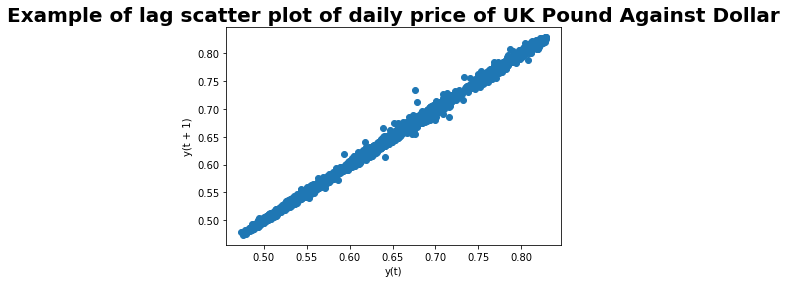

In [16]:
from pandas.plotting import lag_plot
lag_plot(series = data.rate)
plt.title('Example of lag scatter plot of daily price of UK Pound Against Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [ ]:
# We can see from the above lag plot that the exchange rate at any given point of time is highly correlated to its previous values.

In [19]:
values = pd.DataFrame(data.rate.values)
lags = 7
columns = [values]

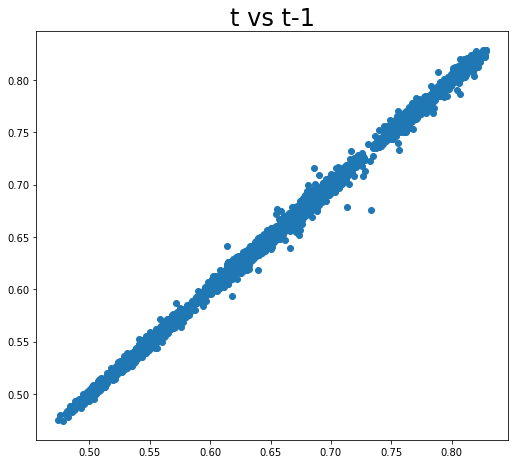

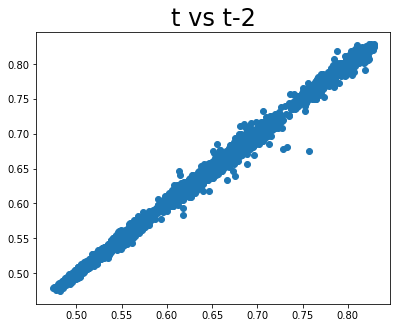

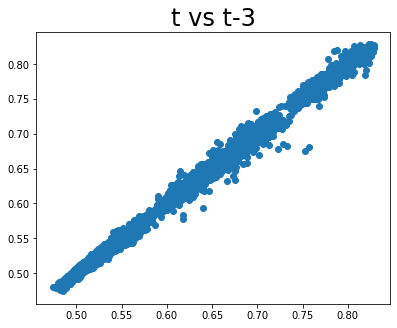

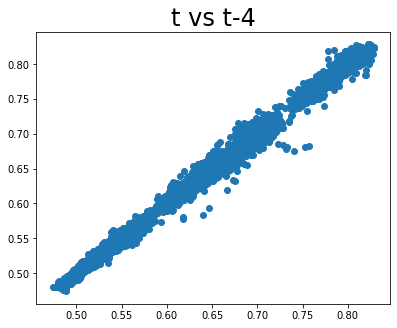

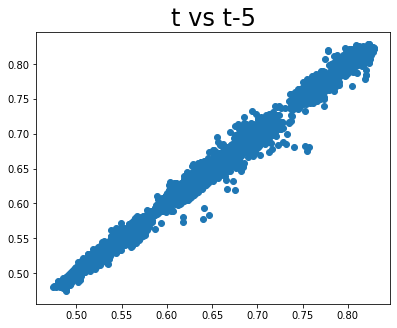

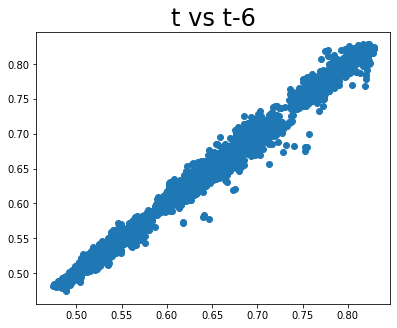

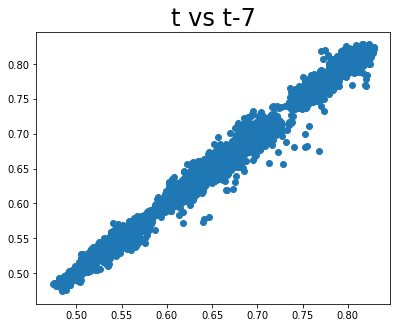

In [20]:
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1, figsize=(8,6))

for i in range(1, (lags+1)):
  ax = plt.subplot(240 + i)
  plt.subplots_adjust(left = 0.1, bottom=0.1, right=1.9, top =2, wspace = -0.6, hspace = 0.01)
  ax.set_title('t vs t-' + str(i), family = 'Arial', fontsize = 24)
  plt.scatter(x = dataframe['t'].values, y = dataframe['t-'+str(i)].values)
  plt.show()

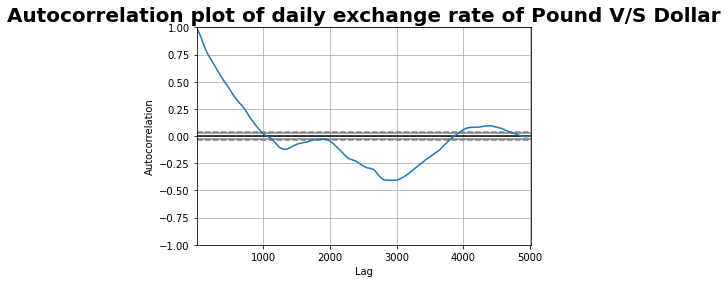

In [22]:
pd.plotting.autocorrelation_plot(data.rate)
plt.title('Autocorrelation plot of daily exchange rate of Pound V/S Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['rate'].tolist())
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.219928
p-value 0.664965
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# Since our Test Statistic value is greater than our critical value at 5%, we can say that our time series is non-stationarity.

In [25]:
# Now we'll difference our series once to see if this removes stationarity.

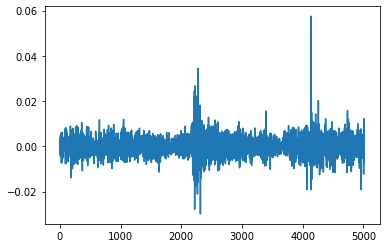

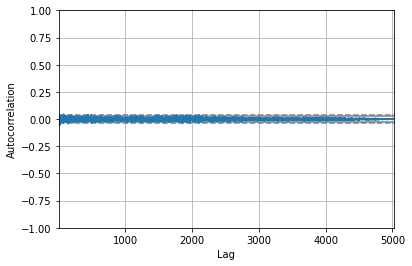

In [24]:
diff = list()
for i in range(1, len(data)):
  value = data['rate'].tolist()[i] - data['rate'].tolist()[i-1]
  diff.append(value)

# line plot

plt.plot(diff)
plt.show()

# Auto-correlation plot

pd.plotting.autocorrelation_plot(diff)
plt.show()

In [26]:
# Let's run the ADF test again after differencing.

In [27]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.503825
p-value 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [28]:
# We can see that our p-value is now approximately close to 0, so we can say that our time-series is now stationary.

In [29]:
# Now let's plot our ACF and PACF plots.

<Figure size 864x432 with 0 Axes>

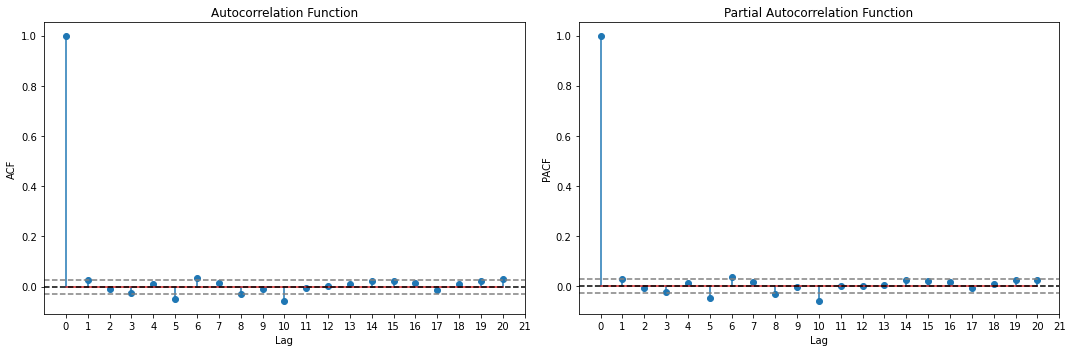

In [30]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(diff, nlags = 20)
lag_pacf = pacf(diff, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

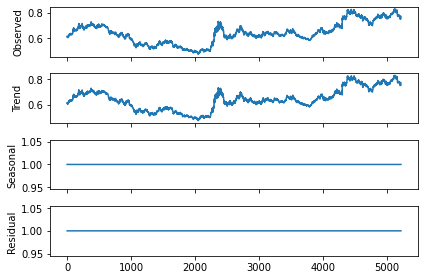

In [54]:
sdec = seasonal_decompose(data.rate, model='multiplicative', freq=1)
sdec.plot();

In [31]:
# We can see that the lag values at 5 for both ACF and PACF functions lie outside the error band. So, we'll take these and run our model.

In [33]:
X_train, X_val = data[:-30], data[-30:]

print('X_train Shape: ', X_train.shape)
print('X_val Shape: ', X_val.shape)

X_train Shape:  (4989, 2)
X_val Shape:  (30, 2)


In [56]:
predictions = []

arima = sm.tsa.statespace.SARIMAX(X_train.rate,order=(10,1,10),seasonal_order=(1,1,1,6),
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
# Get a 30 days prediction.
predictions.append(arima.forecast(30))

In [59]:
#converting and reshaping 
predictions = np.array(predictions).reshape((30,))

In [60]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                                rate   No. Observations:                 4989
Model:             SARIMAX(10, 1, 10)x(1, 1, 1, 6)   Log Likelihood               20298.575
Date:                             Tue, 16 Aug 2022   AIC                         -40551.149
Time:                                     12:51:34   BIC                         -40401.415
Sample:                                          0   HQIC                        -40498.651
                                            - 4989                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0246      0.504      0.049      0.961      -0.963       1.012
ar.L2          0.0233      0.319      0.073      0.942      -0.602       0.649
ar.L3         -0.1699      0.309     -0.550      0.582      -0.775       0.435
ar.L4          0.1714      0.315      0.544      0.587      -0.446       0.789
ar.L5         -0.0353      0.046     -0.761      0.446      -0.126       0.056
ar.L6          0.2121      0.300      0.707      0.479      -0.376       0.800
ar.L7          0.0268      0.099      0.271      0.786      -0.167       0.220
ar.L8         -0.0844      0.067     -1.267      0.205      -0.215       0.046
ar.L9          0.0131      0.093      0.141      0.888      -0.169       0.195
ar.L10        -0.1036      0.093     -1.112      0.266      -0.286       0.079
ma.L1         -0.0198      0.504     -0.039      0.969      -1.007       0.968
ma.L2         -0.0147      0.320     -0.046      0.963      -0.641       0.612
ma.L3          0.1580      0.305      0.518      0.605      -0.440       0.756
ma.L4         -0.1301      0.309     -0.421      0.674      -0.735       0.475
ma.L5         -0.0204      0.041     -0.502      0.616      -0.100       0.059
ma.L6         -0.7019      0.122     -5.745      0.000      -0.941      -0.462
ma.L7         -0.0226      0.358     -0.063      0.950      -0.723       0.678
ma.L8          0.0514      0.219      0.235      0.815      -0.378       0.481
ma.L9         -0.0375      0.249     -0.151      0.880      -0.526       0.451
ma.L10         0.1497      0.189      0.792      0.428      -0.221       0.520
ar.S.L6        0.2228      0.270      0.827      0.408      -0.305       0.751
ma.S.L6       -0.6090      0.153     -3.983      0.000      -0.909      -0.309
sigma2      1.552e-05   1.35e-07    115.197      0.000    1.53e-05    1.58e-05
===================================================================================
Ljung-Box (Q):                      203.52   Jarque-Bera (JB):             29532.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

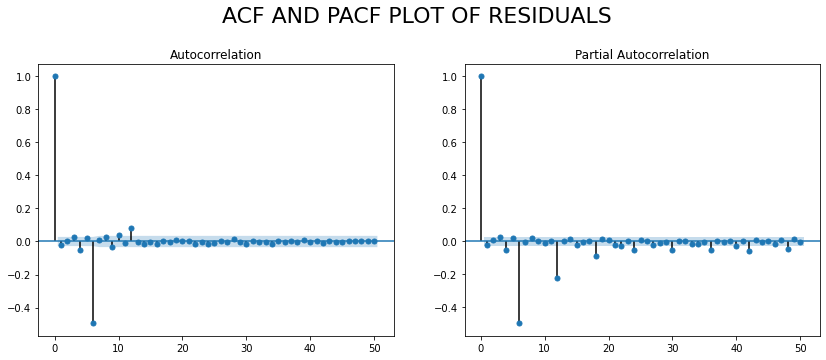

In [61]:
res = arima.resid
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('ACF AND PACF PLOT OF RESIDUALS', fontsize=22, x=0.5, y=1.04)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

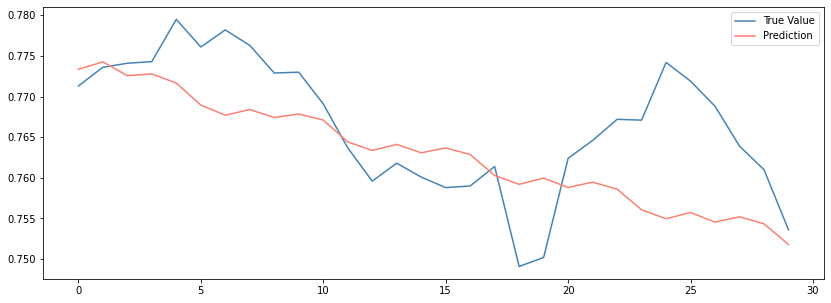

In [62]:
y_val = data.rate[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, color='steelblue');
plt.plot(np.arange(len(y_val)), predictions, color='salmon');
plt.legend(['True Value', 'Prediction']);

In [63]:
arima_mae = mean_absolute_error(y_val, predictions)
arima_mse = mean_squared_error(y_val, predictions)
arima_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)

Mean Absolute Error:    0.006213829931170393
Mean Squared Error:    6.0438366890731066e-05
Root Mean Squared Error:    0.007774211657186282
